In [172]:
import pandas as pd
import numpy as np

In [173]:
import matplotlib.pyplot as plt

In [174]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [175]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [176]:
x,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1,noise=30,random_state=13)

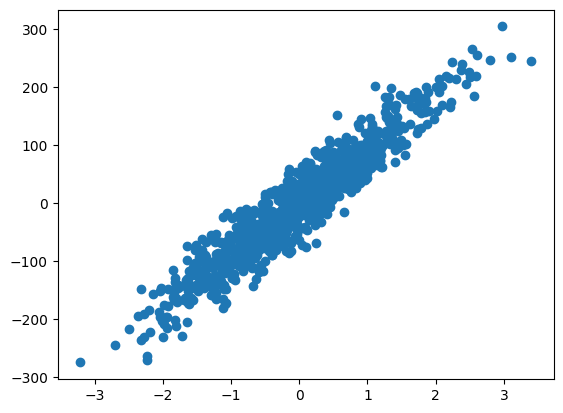

In [177]:
plt.scatter(x, y)

In [178]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [179]:
model.coef_

array([89.52596582])

In [180]:
model.intercept_

0.84257316455032

In [181]:
import time

b = -20
m = 20
all_b = []
all_m = []
all_cost = []
all_lr = []


epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(x.shape[0]):
        
        lr = learning_rate(i * x.shape[0] + j)
        
        idx = np.random.randint(x.shape[0], size=1)
        
        slope_b = -2 * (y[idx] - (m * x[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * x[idx]) -  b) * x[idx]
        cost = (y[idx] - m * x[idx] -b) ** 2
        
        
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
print("Total time taken",time.time() - start)

Total time taken 0.09235715866088867


In [182]:
len(all_cost)

1000

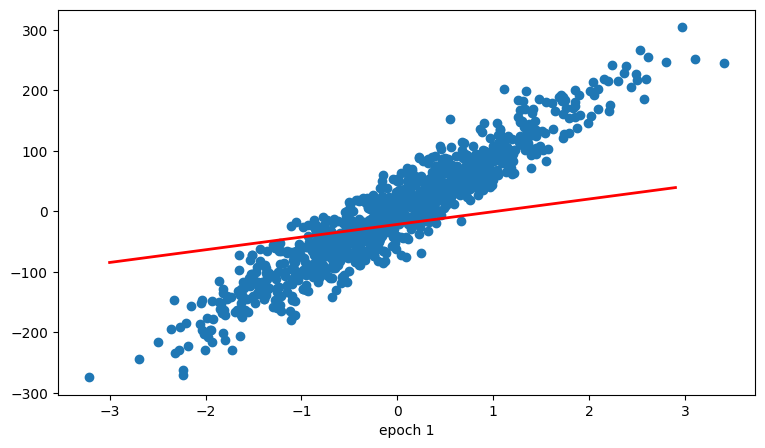

In [183]:
fig, ax = plt.subplots(figsize=(9,5))


x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(x, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [184]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*x.reshape(1000) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

Frame 0: m = [[20.9965673]], b = [[-21.62110332]]


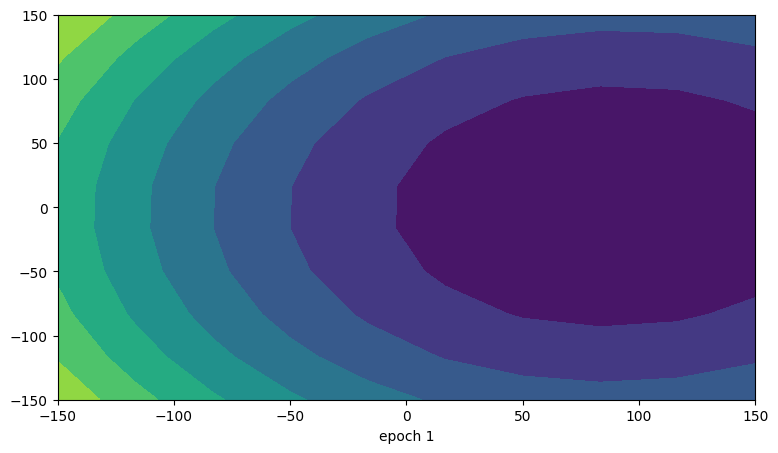

In [185]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
    
    print(f"Frame {i}: m = {all_m[i]}, b = {all_b[i]}")  # Debugging print
    
    return line,
     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)

Frame 0: m = -100.0, b = -100.0
Frame 0: m = -100.0, b = -100.0
Frame 1: m = -97.97979797979798, b = -97.97979797979798
Frame 2: m = -95.95959595959596, b = -95.95959595959596
Frame 3: m = -93.93939393939394, b = -93.93939393939394
Frame 4: m = -91.91919191919192, b = -91.91919191919192
Frame 5: m = -89.8989898989899, b = -89.8989898989899
Frame 6: m = -87.87878787878788, b = -87.87878787878788
Frame 7: m = -85.85858585858585, b = -85.85858585858585
Frame 8: m = -83.83838383838383, b = -83.83838383838383
Frame 9: m = -81.81818181818181, b = -81.81818181818181
Frame 10: m = -79.79797979797979, b = -79.79797979797979
Frame 11: m = -77.77777777777777, b = -77.77777777777777
Frame 12: m = -75.75757575757575, b = -75.75757575757575
Frame 13: m = -73.73737373737373, b = -73.73737373737373
Frame 14: m = -71.71717171717171, b = -71.71717171717171
Frame 15: m = -69.69696969696969, b = -69.69696969696969
Frame 16: m = -67.67676767676767, b = -67.67676767676767
Frame 17: m = -65.65656565656565, b

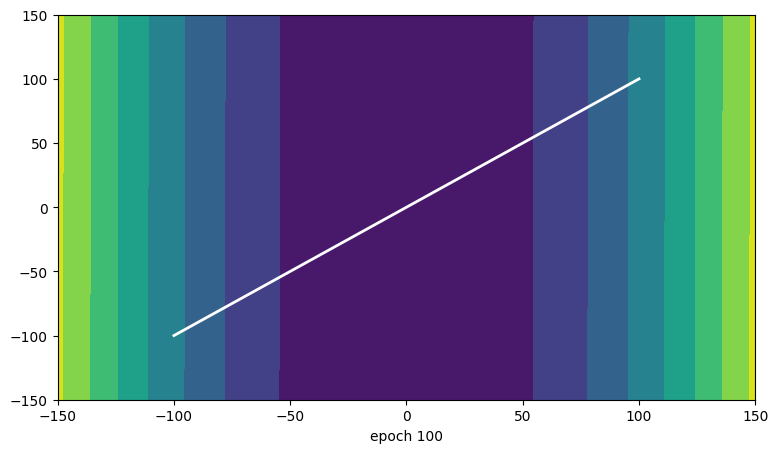

In [186]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr, b_arr)

final = np.vstack((mGrid.ravel().reshape(1, 100), bGrid.ravel().reshape(1, 100))).T

z_arr = []

# Replace x and y with your actual data
x = np.random.rand(100) * 300 - 150
y = np.random.rand(100) * 300 - 150

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i, 0] * x.reshape(100) - final[i, 1])**2))

z_arr = np.array(z_arr).reshape(10, 10)

# Example values for animation (replace these with your actual data)
all_m = np.linspace(-100, 100, 100)
all_b = np.linspace(-100, 100, 100)
num_epochs = list(range(0, 100))

# Set up the figure and axis
fig = plt.figure(figsize=(9, 5)) 
axis = plt.axes(xlim=(-150, 150), ylim=(-150, 150))

# Contour plot
axis.contourf(m_arr, b_arr, z_arr)

# Initialize a line that will be updated in the animation
line, = axis.plot([], [], lw=2, color='white')

# Initialize data lists for the line
xdata, ydata = [], []

# Animation function
def animate(i): 
    label = f'epoch {i + 1}'
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
    
    # Debugging output
    print(f"Frame {i}: m = {all_m[i]}, b = {all_b[i]}") 
    
    return line,

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=len(num_epochs), repeat=False, interval=100)

# Save the animation as a GIF
f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

plt.show()

In [187]:
all_b[-1]

100.0

In [188]:
all_m[-1]

100.0

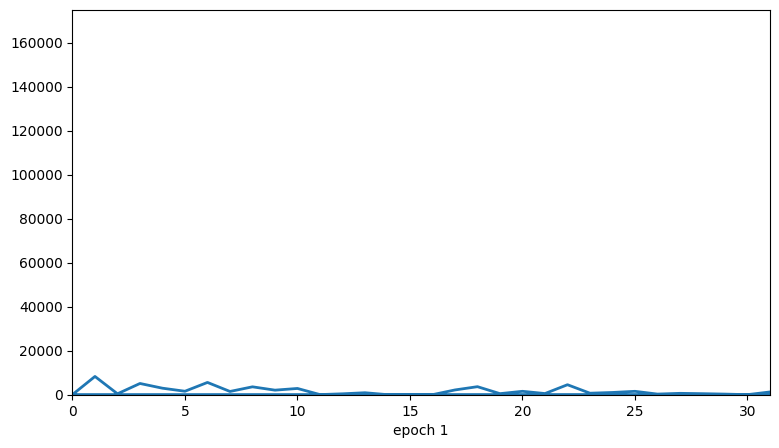

In [189]:
num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 175000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 150)

f = r"stochastic_animation_cost_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

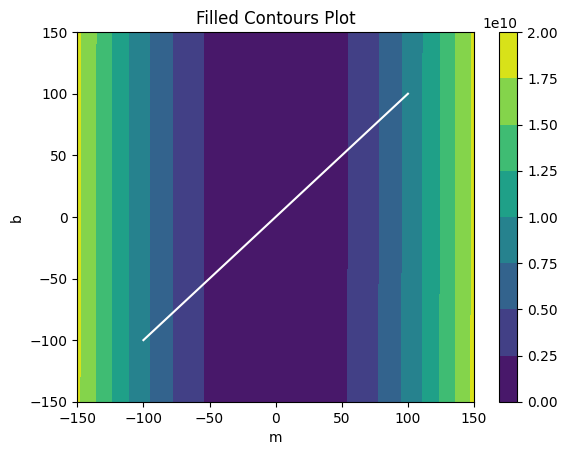

<Figure size 1800x400 with 0 Axes>

In [190]:
fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

In [191]:
all_lr[0]

0.1

In [192]:

all_lr[-1]

0.004766444232602479